### Roksana Cieśla
# Anomaly detection


In [4]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('./ex8data1.mat')  
X = data['X']   
# TODO: amount of data
X.shape

(307, 2)

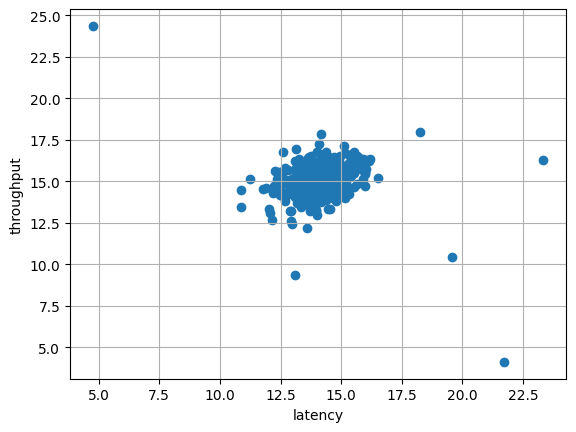

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.xlabel('latency')
plt.ylabel('throughput')
plt.show()

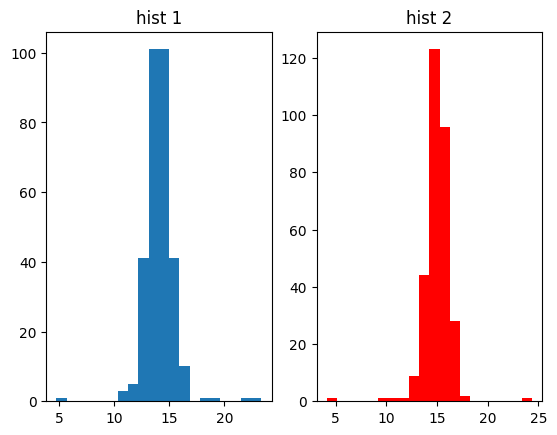

In [6]:
plt.figure()
plt.subplot(1,2,1)
plt.hist(X[:,0], bins = 20)
plt.title('hist 1')

plt.subplot(1,2,2)
plt.hist(X[:,1], bins = 20, color="red")
plt.title('hist 2')
plt.show()

### Gaussian distribution 

In [7]:
def estimate_gaussian(X):  
  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  return mu, sigma


mu, sigma = estimate_gaussian(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))

### Calculate probability

In [8]:
Xval = data['Xval']  
yval = data['yval']
 
Xval.shape

(307, 2)

In [9]:
yval.shape

(307, 1)

In [10]:
from scipy import stats

p = np.zeros((X.shape[0], X.shape[1]))
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], np.sqrt(sigma[0]))
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], np.sqrt(sigma[1]))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], mu[0], np.sqrt(sigma[0]))
pval[:, 1] = stats.norm.pdf(Xval[:, 1], mu[1], np.sqrt(sigma[1]))

### Selecting the threshold

In [15]:
from sklearn.metrics import f1_score
def select_threshold(pval, yval):
  best_f1 = 0
  best_epsilon = 0
  for tres in np.linspace(pval.min(), pval.max(), 10000).tolist():
    t = pval <= tres
    y = np.logical_or(t[:,0],t[:,1])
    f1 = f1_score(yval, y)
    if f1 > best_f1:
      best_f1 = f1
      best_epsilon = tres
  return best_epsilon, best_f1

In [16]:
best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(6.978313623558666e-05, 0.8750000000000001)

### Anomaly detection result

In [17]:
indexes = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = [X[i] for i in indexes][0]

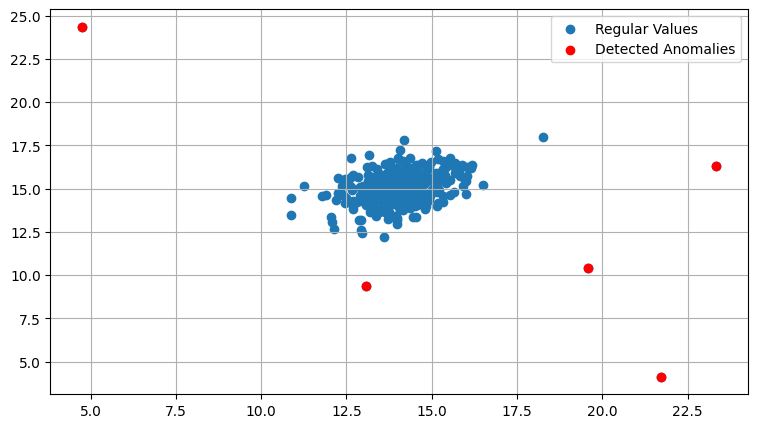

In [18]:
plt.figure(figsize=(9,5))
plt.scatter(X[:,0], X[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], color="red")
plt.grid()
plt.legend(["Regular Values", "Detected Anomalies"])
plt.show()